# TITANIC PROJECT

In [45]:
import os

In [1]:
# loading Data
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Splitting

from sklearn.model_selection import train_test_split


# Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm



# Evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

# hyperparameter Tunning 
from sklearn.model_selection import RandomizedSearchCV

ModuleNotFoundError: No module named 'pandas'

In [47]:

os.chdir('C:/datasets/')
df1=pd.read_csv("train_titanic (1).csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA (Exploratory Data Analysis)

In [48]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [51]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
df1['Age'].mean()
df1['Age'].max()

80.0

In [53]:
df1['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [54]:
#check missing values
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

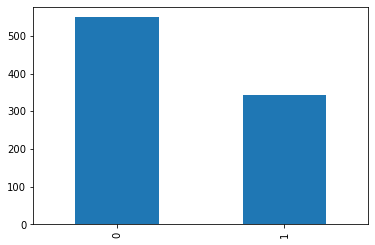

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
df1['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

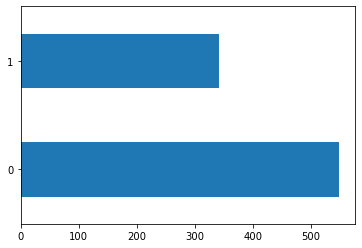

In [56]:
df1['Survived'].value_counts().plot(kind='barh')

<AxesSubplot:>

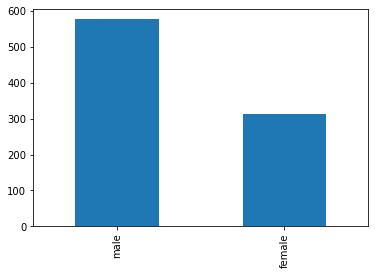

In [57]:
df1['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='Count'>

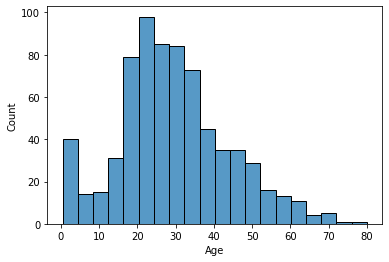

In [58]:
sns.histplot(x=df1['Age'])

<AxesSubplot:ylabel='Embarked'>

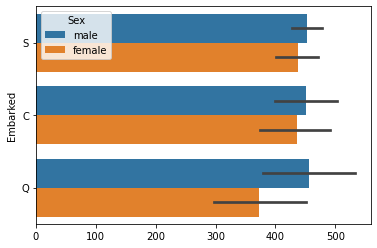

In [59]:
sns.barplot(x=df1.index,y=df1['Embarked'],hue=df1['Sex'])

<AxesSubplot:ylabel='Age'>

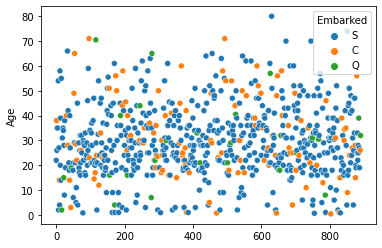

In [60]:
sns.scatterplot(x=df1.index,y=df1['Age'],hue=df1['Embarked'])

In [61]:
# features
df=df1


In [62]:
x=df.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [63]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Preprocessing

In [64]:
#segregation of cat and con values
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
        

In [65]:
cat

['Sex', 'Embarked']

In [66]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [67]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])

In [68]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scalar', StandardScaler())])

In [69]:
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])


In [70]:
cat_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encode', OrdinalEncoder())])

In [71]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 ['Sex', 'Embarked'])])

In [73]:
x1=pd.DataFrame(pre.fit_transform(x))
x1


,0,1,2,3,4,5,6
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,2.0
...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,1.0,2.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,2.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,2.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,1.0,0.0


# Splitting of data

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=21,stratify=y)

# Model Building

In [77]:
la=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()
sv=svm.SVC()

In [78]:
list1=[la,dt,rf,kn,sv]


In [79]:
for i in list1:
    i.fit(x_train,y_train)
    y_pred_train=i.predict(x_train)
    y_pred_test=i.predict(x_test)
    f1_train=f1_score(y_pred_train,y_train)
    f1_test=f1_score(y_pred_test,y_test)
    print('*'*40)
    print(i)
    print("Training Error",f1_train)
    print("Testing Error",f1_test)


****************************************
LogisticRegression()
Training Error 0.7342256214149141
Testing Error 0.7131782945736433
****************************************
DecisionTreeClassifier()
Training Error 0.9757914338919926
Testing Error 0.6808510638297872
****************************************
RandomForestClassifier()
Training Error 0.9760589318600368
Testing Error 0.7153284671532847
****************************************
KNeighborsClassifier()
Training Error 0.7735849056603774
Testing Error 0.6901408450704226
****************************************
SVC()
Training Error 0.7883495145631068
Testing Error 0.6880000000000001


# Logistic Regression shows the best result for model

In [80]:
import numpy as np

In [81]:
grid={'C':np.arange(0.1,1,0.1)}
grid

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}

In [82]:
rs=RandomizedSearchCV(la,param_distributions=grid,cv=3)
rs.fit(x_train,y_train)

C:\Users\admin\Documents\New folder\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [83]:
rs.best_params_

{'C': 0.2}

In [84]:
la1=rs.best_estimator_
la1

LogisticRegression(C=0.2)

In [85]:
y_pred_train=la1.predict(x_train)

In [86]:
acc=accuracy_score(y_pred_train,y_train)
clf=classification_report(y_pred_train,y_train)
cnf=confusion_matrix(y_pred_train,y_train)
print("Accuracy Score=",acc)
print("Classification Report=",clf)
print("Confusion Matrix=",cnf)

Accuracy Score= 0.8146067415730337
Classification Report=               precision    recall  f1-score   support

           0       0.88      0.83      0.85       469
           1       0.70      0.79      0.74       243

    accuracy                           0.81       712
   macro avg       0.79      0.81      0.80       712
weighted avg       0.82      0.81      0.82       712

Confusion Matrix= [[388  81]
 [ 51 192]]


# Unseen Data Prediction

In [88]:
import pandas as pd
os.chdir('C:/datasets/')
df2=pd.read_csv("test_titanic (1).csv")
df2

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 26: invalid start byte